**Importamos las librerías necesarias:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Cargamos nuestra base de datos. Se transforma la variable 'Fecha' a datetime para evitar problemas de visualización:**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/cpizarrov/proyecto_final/main/covid_global.csv")
df['Fecha'] = pd.to_datetime(df['Fecha'])

**Antes de proceder con la creación de nuevas variables, nos gustaría saber si hay algo más que decir acerca de la evolución de los casos acumulados:**

<AxesSubplot:xlabel='Fecha', ylabel='Confirmados acumulados'>

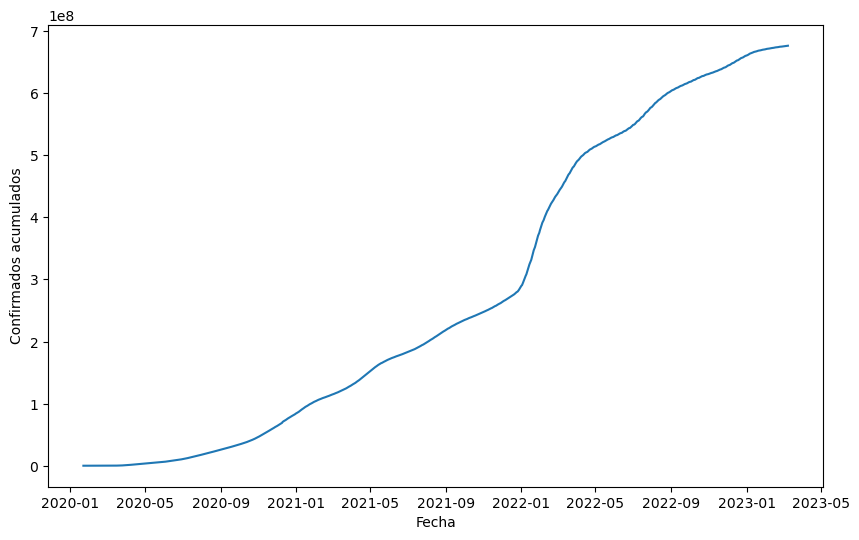

In [3]:
casos_globales = df.groupby('Fecha')[['Confirmados acumulados', 'Muertes acumuladas', 'Recuperados acumulados']].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=casos_globales, x='Fecha', y='Confirmados acumulados', linestyle='-')

<AxesSubplot:xlabel='Fecha', ylabel='Muertes acumuladas'>

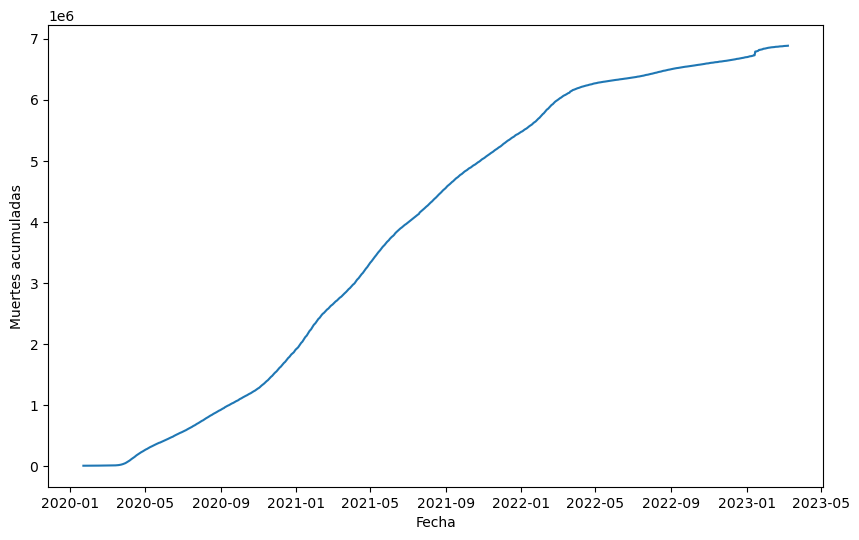

In [4]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=casos_globales, x='Fecha', y='Muertes acumuladas', linestyle='-')

<AxesSubplot:xlabel='Fecha', ylabel='Recuperados acumulados'>

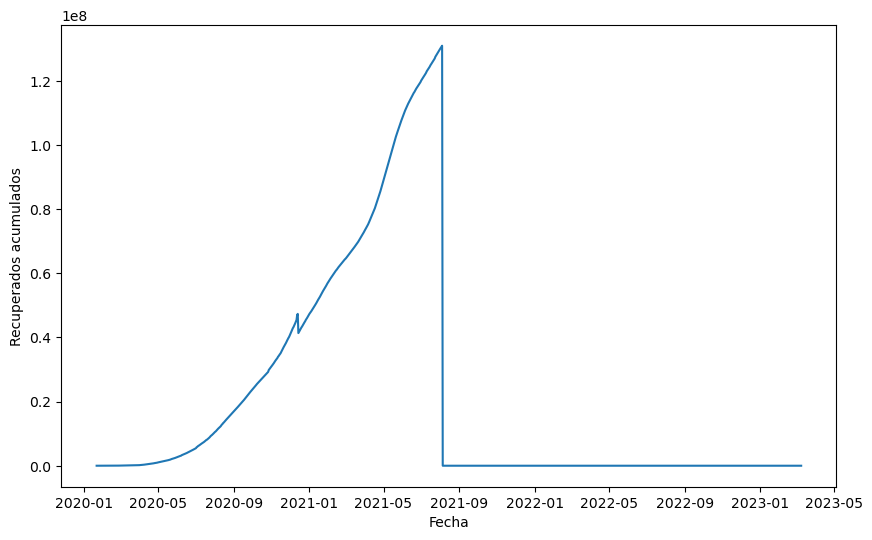

In [5]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=casos_globales, x='Fecha', y='Recuperados acumulados', linestyle='-')

**En general llama la atención que el año 2022 hayan aumentado abruptamente los casos confirmados. Lo ideal es estudiar esto a más detalle con los casos a nivel diario, por lo cual ahora es el momento ideal para comenzar a añadir nuevas variables:**

- La anomalía en los casos recuperados es algo que tenemos mapeado con anterioridad, pero no lo corregiremos aún. 

**Se añade la variable 'confirmados diarios' y observamos algunas métricas:**

In [6]:
df = df.sort_values(by=['País', 'Fecha'], ascending=[True, True])
df

,País,Fecha,Confirmados acumulados,Muertes acumuladas,Recuperados acumulados
0,Afghanistan,2020-01-22,0,0,0
197,Afghanistan,2020-01-23,0,0,0
394,Afghanistan,2020-01-24,0,0,0
591,Afghanistan,2020-01-25,0,0,0
788,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
224382,Zimbabwe,2023-03-05,264127,5668,0
224579,Zimbabwe,2023-03-06,264127,5668,0
224776,Zimbabwe,2023-03-07,264127,5668,0
224973,Zimbabwe,2023-03-08,264276,5671,0


In [7]:
df['Confirmados diarios'] = df.groupby('País')['Confirmados acumulados'].diff()
df['Confirmados diarios'].describe()

count    2.249740e+05
mean     3.007314e+03
std      1.805989e+04
min     -3.488400e+05
25%      0.000000e+00
50%      2.700000e+01
75%      5.840000e+02
max      1.354505e+06
Name: Confirmados diarios, dtype: float64

**Observamos anomalías, pues no debiesen existir valores negativos (el mínimo indica que la variación diaria de confirmados decreció en algunos registros, lo que no debería ser posible). Procedemos a investigar esta situación:**

In [8]:
df[df['Confirmados diarios'] < 0]

,País,Fecha,Confirmados acumulados,Muertes acumuladas,Recuperados acumulados,Confirmados diarios
11426,Afghanistan,2020-03-20,24,0,1,-2.0
140264,Afghanistan,2022-01-03,158183,7364,0,-6.0
218473,Afghanistan,2023-02-04,208621,7894,0,-48.0
32117,Antigua and Barbuda,2020-07-03,68,3,23,-1.0
93187,Antigua and Barbuda,2021-05-09,1231,32,1168,-1.0
...,...,...,...,...,...,...
16145,Uruguay,2020-04-12,480,7,231,-21.0
179854,Vanuatu,2022-07-22,11723,14,0,-7.0
181233,Vanuatu,2022-07-29,11724,14,0,-6.0
39988,Yemen,2020-08-11,1831,523,919,-1.0


In [9]:
df[(df['Fecha'] > "2023-02-02") & (df['País'] == 'Afghanistan')]

,País,Fecha,Confirmados acumulados,Muertes acumuladas,Recuperados acumulados,Confirmados diarios
218276,Afghanistan,2023-02-03,208669,7891,0,0.0
218473,Afghanistan,2023-02-04,208621,7894,0,-48.0
218670,Afghanistan,2023-02-05,208627,7896,0,6.0
218867,Afghanistan,2023-02-06,208704,7896,0,77.0
219064,Afghanistan,2023-02-07,208721,7896,0,17.0
219261,Afghanistan,2023-02-08,208771,7896,0,50.0
219458,Afghanistan,2023-02-09,208771,7896,0,0.0
219655,Afghanistan,2023-02-10,208943,7896,0,172.0
219852,Afghanistan,2023-02-11,208971,7896,0,28.0
220049,Afghanistan,2023-02-12,208982,7896,0,11.0


In [10]:
df[(df['Fecha'] > "2020-04-10") & (df['País'] == 'Uruguay')]

,País,Fecha,Confirmados acumulados,Muertes acumuladas,Recuperados acumulados,Confirmados diarios
15948,Uruguay,2020-04-11,501,7,224,7.0
16145,Uruguay,2020-04-12,480,7,231,-21.0
16342,Uruguay,2020-04-13,483,8,248,3.0
16539,Uruguay,2020-04-14,492,8,260,9.0
16736,Uruguay,2020-04-15,493,9,272,1.0
...,...,...,...,...,...,...
224374,Uruguay,2023-03-05,1034303,7617,0,0.0
224571,Uruguay,2023-03-06,1034303,7617,0,0.0
224768,Uruguay,2023-03-07,1034303,7617,0,0.0
224965,Uruguay,2023-03-08,1034303,7617,0,0.0


**Para estos casos, simplemente reemplazaremos los valores negativos resultantes en 'Confirmados diarios' con 0, dado que no tenemos forma de saber si se debe a una cuestión metodológica (correcciones en conteos) o errores de otro tipo.**

**Ahora bien, ¿Qué sucede si añadimos muertes diarios y recuperados diarios?:**

In [11]:
df['Muertes diarias'] = df.groupby('País')['Muertes acumuladas'].diff()
df['Muertes diarias'].describe()

count    224974.000000
mean         30.589179
std         205.992513
min       -1918.000000
25%           0.000000
50%           0.000000
75%           6.000000
max       59961.000000
Name: Muertes diarias, dtype: float64

In [12]:
df[df['Muertes diarias'] < -1000]

,País,Fecha,Confirmados acumulados,Muertes acumuladas,Recuperados acumulados,Confirmados diarios,Muertes diarias
24593,Spain,2020-05-25,235400,26834,150376,-372.0,-1918.0


In [13]:
df[(df['Fecha'] > "2020-05-24") & (df['País'] == 'Spain')]

,País,Fecha,Confirmados acumulados,Muertes acumuladas,Recuperados acumulados,Confirmados diarios,Muertes diarias
24593,Spain,2020-05-25,235400,26834,150376,-372.0,-1918.0
24790,Spain,2020-05-26,236259,27117,150376,859.0,283.0
24987,Spain,2020-05-27,236259,27117,150376,0.0,0.0
25184,Spain,2020-05-28,237906,27119,150376,1647.0,2.0
25381,Spain,2020-05-29,238564,27121,150376,658.0,2.0
...,...,...,...,...,...,...,...
224351,Spain,2023-03-05,13770429,119479,0,0.0,0.0
224548,Spain,2023-03-06,13770429,119479,0,0.0,0.0
224745,Spain,2023-03-07,13770429,119479,0,0.0,0.0
224942,Spain,2023-03-08,13770429,119479,0,0.0,0.0


In [14]:
df['Recuperados diarios'] = df.groupby('País')['Recuperados acumulados'].diff()
df['Recuperados diarios'].describe()

count    2.249740e+05
mean    -1.333487e-04
std      8.252249e+04
min     -3.097475e+07
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.123456e+06
Name: Recuperados diarios, dtype: float64

**Nuevamente observamos registros donde los valores acumulados bajan. Lamentablente tocar estos valores conlleva complejidades que superan al rol de un analista externo y debiese ser revisado meticulosamente con metodológos e ingenieros de datos que sean parte del proyecto. Por ahora, la única decisión sensata es que estos valores diarios negativos (NO los acumulados) sean convertidos en ceros, dado que de otra forma introduciríamos información inconsistente:**

- De paso, también se reemplazarán los nulos por ceros, dado que son valores generados al no tener un día anterior de comparación.

In [15]:
df['Confirmados diarios'] = df['Confirmados diarios'].apply(lambda x: 0 if x < 0 else x)
df['Confirmados diarios'] = df['Confirmados diarios'].fillna(0)
df['Confirmados diarios'].describe()

count    2.251710e+05
mean     3.008464e+03
std      1.803431e+04
min      0.000000e+00
25%      0.000000e+00
50%      2.700000e+01
75%      5.820000e+02
max      1.354505e+06
Name: Confirmados diarios, dtype: float64

In [16]:
df['Muertes diarias'] = df['Muertes diarias'].apply(lambda x: 0 if x < 0 else x)
df['Muertes diarias'] = df['Muertes diarias'].fillna(0)
df['Muertes diarias'].describe()

count    225171.000000
mean         30.596520
std         205.843867
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max       59961.000000
Name: Muertes diarias, dtype: float64

In [17]:
df['Recuperados diarios'] = df['Recuperados diarios'].apply(lambda x: 0 if x < 0 else x)
df['Recuperados diarios'] = df['Recuperados diarios'].fillna(0)
df['Recuperados diarios'].describe()

count    2.251710e+05
mean     6.107957e+02
std      6.343016e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.000000e+00
max      1.123456e+06
Name: Recuperados diarios, dtype: float64

**Ahora, generaremos nuevas variables para enriquecer nuestro análisis posteriormente: Casos Activos y Letalidad.**

- La 'Letalidad' es un cálculo que debe volver a ser realizado al momento de trabajar con agrupaciones. De hecho, si fuésemos a trasladar esta tabla a una plataforma como LookerStudio o Tableau, es mucho más conveniente generarla en dicha plataforma. 

In [18]:
df['Casos Activos'] = df['Confirmados acumulados'] - df['Recuperados acumulados'] - df['Muertes acumuladas']
df['Casos Activos'] = df['Casos Activos'].apply(lambda x: 0 if x < 0 else x)
df['Casos Activos'] = df['Casos Activos'].fillna(0)
df['Casos Activos'].describe()

count    2.251710e+05
mean     1.283550e+06
std      5.751364e+06
min      0.000000e+00
25%      7.770000e+02
50%      2.117500e+04
75%      3.344730e+05
max      1.026789e+08
Name: Casos Activos, dtype: float64

In [19]:
df['Letalidad'] = (df['Muertes acumuladas'] / df['Confirmados acumulados']) * 100
df['Letalidad'] = df['Letalidad'].fillna(0)
df['Letalidad']

0         0.000000
197       0.000000
394       0.000000
591       0.000000
788       0.000000
            ...   
224382    2.145937
224579    2.145937
224776    2.145937
224973    2.145863
225170    2.145863
Name: Letalidad, Length: 225171, dtype: float64

**Ahora bien, ¿Cómo evolucionan nuestras nuevas variables? ¿Nos dan nueva información sobre la calidad de la base?:**

In [20]:
casos_globales = df.groupby('Fecha')[['Confirmados diarios', 'Muertes diarias', 'Recuperados diarios']].sum().reset_index()
casos_globales

,Fecha,Confirmados diarios,Muertes diarias,Recuperados diarios
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,100.0,1.0,2.0
2,2020-01-24,287.0,8.0,7.0
3,2020-01-25,493.0,16.0,3.0
4,2020-01-26,683.0,14.0,14.0
...,...,...,...,...
1138,2023-03-05,59988.0,186.0,0.0
1139,2023-03-06,63196.0,366.0,0.0
1140,2023-03-07,130437.0,923.0,0.0
1141,2023-03-08,179446.0,1445.0,0.0


<AxesSubplot:xlabel='Fecha', ylabel='Confirmados diarios'>

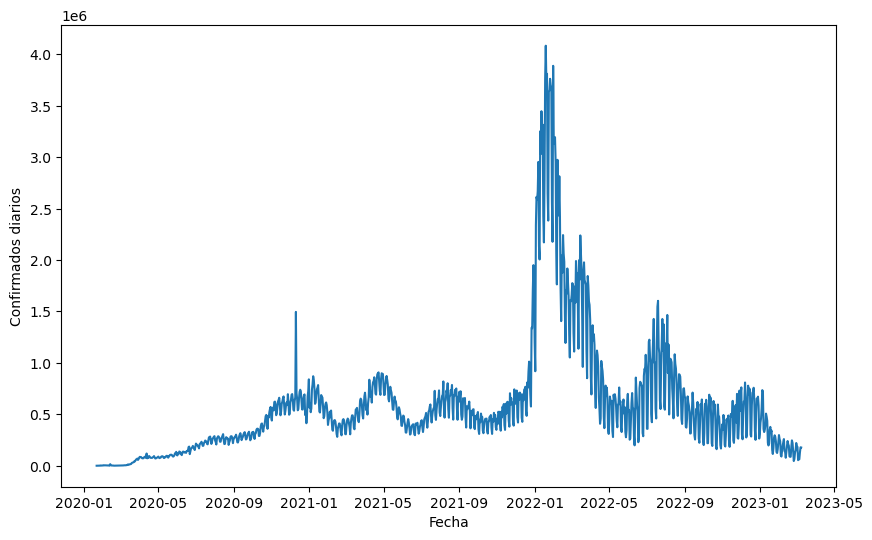

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=casos_globales, x='Fecha', y='Confirmados diarios', linestyle='-')

<AxesSubplot:xlabel='Fecha', ylabel='Muertes diarias'>

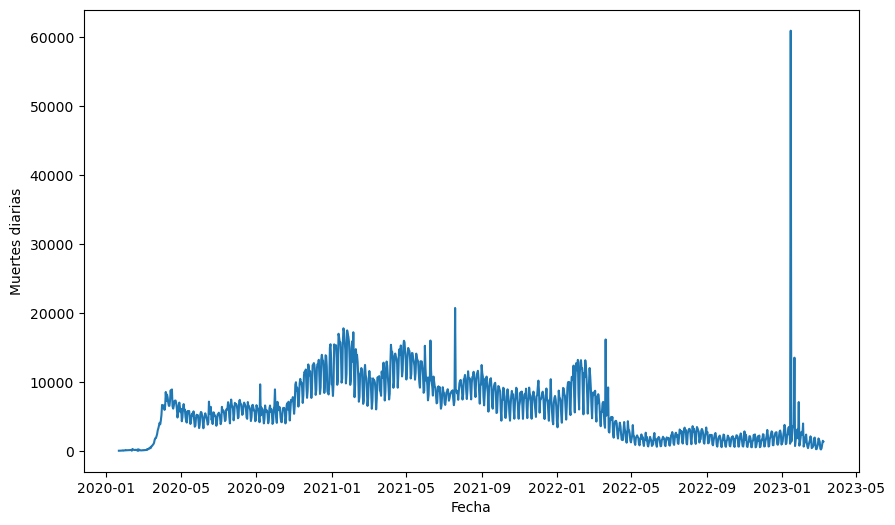

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=casos_globales, x='Fecha', y='Muertes diarias', linestyle='-')

<AxesSubplot:xlabel='Fecha', ylabel='Recuperados diarios'>

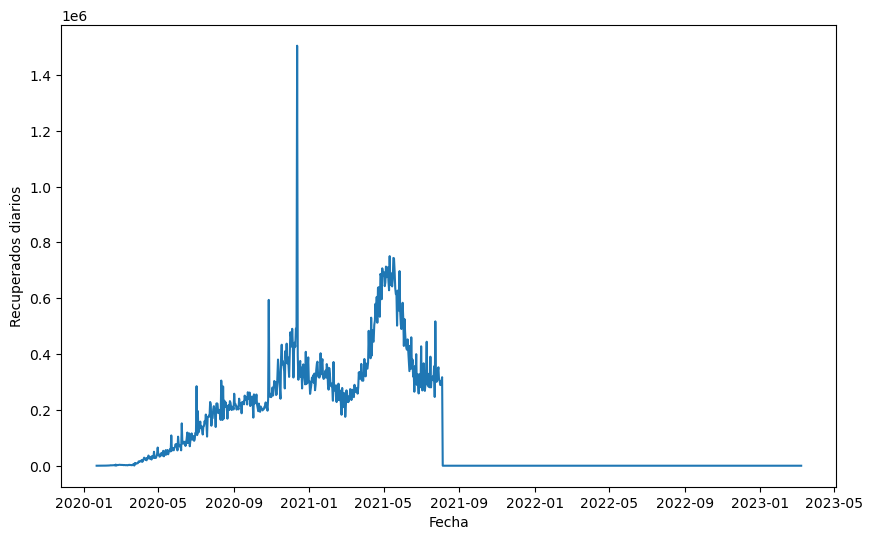

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=casos_globales, x='Fecha', y='Recuperados diarios', linestyle='-')

**Estas vistas nos dan luces de algo que podría estar pasando en la base, dado que en las 3 variables existen peaks extremos de casos. Los que más llaman la atención son los casos fallecidos y los recuperados que no tienen una tendencia natural (como sí es probable en el caso de los confirmados). Por lo que necesitamos observar qué ocurrió en éstos casos.**

- Por ahora obviaremos el hecho de que los recuperados dejan abruptamente de ser registrados, dado que es un caso que ya tenemos mapeado desde antes.

In [24]:
max_confirmadosdiarios = df['Confirmados diarios'].idxmax()
fila_maximoconfirmados = df.loc[max_confirmadosdiarios]
fila_maximoconfirmados

País                                       US
Fecha                     2022-01-10 00:00:00
Confirmados acumulados               61923770
Muertes acumuladas                     840861
Recuperados acumulados                      0
Confirmados diarios                 1354505.0
Muertes diarias                        2048.0
Recuperados diarios                       0.0
Casos Activos                        61082909
Letalidad                            1.357897
Name: 141826, dtype: object

In [25]:
df[(df['Fecha'] > "2022-01-01") & (df['Fecha'] < "2022-01-20") & (df['País'] == 'US')]

,País,Fecha,Confirmados acumulados,Muertes acumuladas,Recuperados acumulados,Confirmados diarios,Muertes diarias,Recuperados diarios,Casos Activos,Letalidad
140250,US,2022-01-02,55396191,826329,0,296243.0,459.0,0.0,54569862,1.491671
140447,US,2022-01-03,56438983,828234,0,1042792.0,1905.0,0.0,55610749,1.467486
140644,US,2022-01-04,57267794,830557,0,828811.0,2323.0,0.0,56437237,1.450304
140841,US,2022-01-05,57943576,832782,0,675782.0,2225.0,0.0,57110794,1.437229
141038,US,2022-01-06,58788182,834879,0,844606.0,2097.0,0.0,57953303,1.420148
141235,US,2022-01-07,59667177,837319,0,878995.0,2440.0,0.0,58829858,1.403316
141432,US,2022-01-08,60075853,838192,0,408676.0,873.0,0.0,59237661,1.395223
141629,US,2022-01-09,60569265,838813,0,493412.0,621.0,0.0,59730452,1.384882
141826,US,2022-01-10,61923770,840861,0,1354505.0,2048.0,0.0,61082909,1.357897
142023,US,2022-01-11,62709985,843380,0,786215.0,2519.0,0.0,61866605,1.344889


**En el caso de los confirmados, es muy probable que la información sea correcta, dado que se observa una tendencia y los casos están bastante críticos durante el período observado. ¿Qué ocurre con el resto de los casos?:**

In [26]:
max_muertesdiarias = df['Muertes diarias'].idxmax()
fila_maximomuertes = df.loc[max_muertesdiarias]
fila_maximomuertes

País                                    China
Fecha                     2023-01-15 00:00:00
Confirmados acumulados                4859037
Muertes acumuladas                      78087
Recuperados acumulados                      0
Confirmados diarios                    6261.0
Muertes diarias                       59961.0
Recuperados diarios                       0.0
Casos Activos                         4780950
Letalidad                            1.607047
Name: 214570, dtype: object

In [27]:
df[(df['Fecha'] > "2023-01-05") & (df['Fecha'] < "2023-01-25") & (df['País'] == 'China')]

,País,Fecha,Confirmados acumulados,Muertes acumuladas,Recuperados acumulados,Confirmados diarios,Muertes diarias,Recuperados diarios,Casos Activos,Letalidad
212797,China,2023-01-06,4745734,17544,0,30495.0,67.0,0.0,4728190,0.369679
212994,China,2023-01-07,4768765,17624,0,23031.0,80.0,0.0,4751141,0.369572
213191,China,2023-01-08,4797126,17698,0,28361.0,74.0,0.0,4779428,0.368929
213388,China,2023-01-09,4808767,17762,0,11641.0,64.0,0.0,4791005,0.369367
213585,China,2023-01-10,4818146,17837,0,9379.0,75.0,0.0,4800309,0.370205
213782,China,2023-01-11,4827425,17904,0,9279.0,67.0,0.0,4809521,0.370881
213979,China,2023-01-12,4836767,18001,0,9342.0,97.0,0.0,4818766,0.372170
214176,China,2023-01-13,4845027,18072,0,8260.0,71.0,0.0,4826955,0.373001
214373,China,2023-01-14,4852776,18126,0,7749.0,54.0,0.0,4834650,0.373518
214570,China,2023-01-15,4859037,78087,0,6261.0,59961.0,0.0,4780950,1.607047


<AxesSubplot:xlabel='Fecha', ylabel='Muertes diarias'>

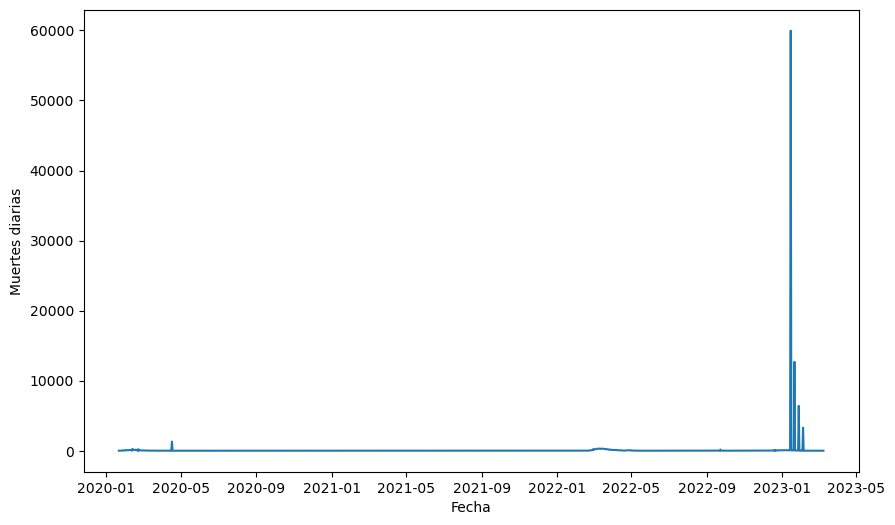

In [28]:
china = df[df['País'] == 'China']
plt.figure(figsize=(10, 6))
sns.lineplot(data=china, x='Fecha', y='Muertes diarias', linestyle='-')

**Aquí encontramos un grave problema para identificar los valores reales diarios: [China reportó grandes acumulados de fallecidos durante Enero](https://cnnespanol.cnn.com/2023/01/15/china-60-000-muertos-por-covid-desde-diciembre-trax/) y no existe un seguimiento a nivel diario de éstos. Por lo cual, si bien su información acumulada puede ser hasta cierto punto certera, no podemos considerar a éste país dentro del análisis diario. Por ahora, lo conservaremos dentro de nuestra base ya que igualmente es de utilidad para calcular totales locales y globales.**

In [29]:
max_recuperadosdiarios = df['Recuperados diarios'].idxmax()
fila_maximorecuperados = df.loc[max_recuperadosdiarios]
fila_maximorecuperados

País                                   Turkey
Fecha                     2020-12-12 00:00:00
Confirmados acumulados                1809809
Muertes acumuladas                      16199
Recuperados acumulados                1581565
Confirmados diarios                   29136.0
Muertes diarias                         222.0
Recuperados diarios                 1123456.0
Casos Activos                          212045
Letalidad                            0.895067
Name: 64206, dtype: object

In [30]:
df[(df['Fecha'] > "2020-12-05") & (df['Fecha'] < "2020-12-20") & (df['País'] == 'Turkey')]

,País,Fecha,Confirmados acumulados,Muertes acumuladas,Recuperados acumulados,Confirmados diarios,Muertes diarias,Recuperados diarios,Casos Activos,Letalidad
63024,Turkey,2020-12-06,828295,14900,431253,30402.0,195.0,4011.0,382142,1.798876
63221,Turkey,2020-12-07,860432,15103,436270,32137.0,203.0,5017.0,409059,1.755281
63418,Turkey,2020-12-08,893630,15314,441515,33198.0,211.0,5245.0,436801,1.713685
63615,Turkey,2020-12-09,925342,15531,447361,31712.0,217.0,5846.0,462450,1.678406
63812,Turkey,2020-12-10,1748567,15751,452593,823225.0,220.0,5232.0,1280223,0.900795
64009,Turkey,2020-12-11,1780673,15977,458109,32106.0,226.0,5516.0,1306587,0.897245
64206,Turkey,2020-12-12,1809809,16199,1581565,29136.0,222.0,1123456.0,212045,0.895067
64403,Turkey,2020-12-13,1836728,16417,1603780,26919.0,218.0,22215.0,216531,0.893818
64600,Turkey,2020-12-14,1866345,16646,1631944,29617.0,229.0,28164.0,217755,0.891904
64797,Turkey,2020-12-15,1898447,16881,1661191,32102.0,235.0,29247.0,220375,0.889200


<AxesSubplot:xlabel='Fecha', ylabel='Recuperados diarios'>

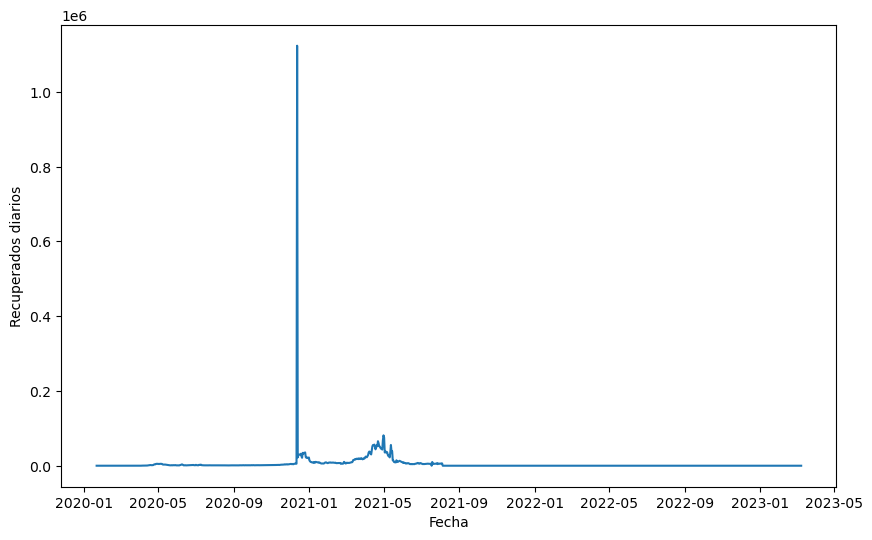

In [31]:
Turkey = df[df['País'] == 'Turkey']
plt.figure(figsize=(10, 6))
sns.lineplot(data=Turkey, x='Fecha', y='Recuperados diarios', linestyle='-')

**Nuevamente nos encontramos con un problema que se produce por ajustes metodológicos (o de otro tipo) que los países generan al momento de reportar los casos de coronavirus. [En el caso de Turquía, observamos que esta alza corresponde a un ajuste en la forma de reportar los casos](https://medicalxpress.com/news/2020-12-turkey-adjusts-coronavirus-cases-million.html). Sin embargo, y bajo el mismo motivo detallado anteriormente, mantendremos esta información dentro de la base, pero manteniendo la advertencia de que pueden sesgar los resultados a nivel diario, por lo que es necesario un correcto tratamiento al momento de utilizarlos para realizar análisis.**